### Exploratory Data Analysis

In [1]:
# Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'../data/train.csv')

# View data
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
#Basic information
df.info()

#Describe the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [3]:
# Identify categorical and numerical columns
print('Categorical columns: ' + str(df.select_dtypes(include=['object']).columns.tolist()))
print('Numerical columns: ' + str(df.select_dtypes(exclude=['object']).columns.tolist()))

Categorical columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
Numerical columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']


In [4]:
#Find the duplicates
df.duplicated().sum()

0

In [5]:
#Find null values
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
df_nan = df.dropna()

In [7]:
print(df_nan.shape)
df_nan.isnull().sum()


(6606, 14)


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [8]:
# Get values for categorical data
# ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
print(df_nan.HomePlanet.unique())
print(df_nan.CryoSleep.unique())
print(df_nan.Cabin.unique())
print(df_nan.Destination.unique())
print(df_nan.VIP.unique())

['Europa' 'Earth' 'Mars']
[False True]
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
[False True]


Text(0.5, 1.0, 'VRDeck')

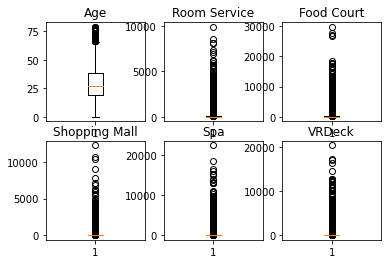

In [9]:
# Display boxplot for numerical data
# 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

fig, axs = plt.subplots(2, 3)
fig.set_facecolor('white')

axs[0,0].boxplot(df_nan[['Age']])
axs[0,0].set_title('Age')

axs[0,1].boxplot(df_nan[['RoomService']])
axs[0,1].set_title('Room Service')

axs[0,2].boxplot(df_nan[['FoodCourt']])
axs[0,2].set_title('Food Court')

axs[1,0].boxplot(df_nan[['ShoppingMall']])
axs[1,0].set_title('Shopping Mall')

axs[1,1].boxplot(df_nan[['Spa']])
axs[1,1].set_title('Spa')

axs[1,2].boxplot(df_nan[['VRDeck']])
axs[1,2].set_title('VRDeck')

In [10]:
df_nan.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553
RoomService,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291
FoodCourt,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025
ShoppingMall,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602
Spa,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854
VRDeck,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950
Transported,-0.082553,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000


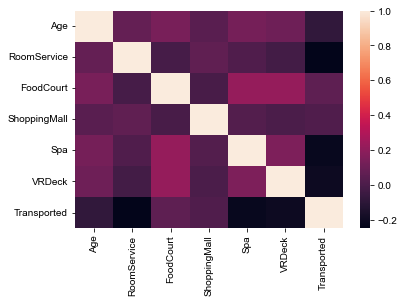

In [11]:
# Correlation plot
sns.heatmap(df_nan.corr())
sns.set(rc={'figure.facecolor': 'white'})

In [12]:
# Drop Columns for PassengerId, Cabin, Name

df_nan = df_nan.drop(columns=['PassengerId', 'Name'])
df_nan.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [13]:
# Split Cabin into Deck, Num and Side

df_nan[['Deck', 'Num', 'Side']] = df_nan['Cabin'].str.split('/', expand=True)
df_nan = df_nan.drop(columns=['Cabin'])

In [14]:
df_nan.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


### Encode Features

In [15]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
le = LabelEncoder()

In [16]:
# Converting string labels into numbers.
df_nan['HomePlanet'] = le.fit_transform(df_nan['HomePlanet'])
df_nan['Destination'] = le.fit_transform(df_nan['Destination'])
df_nan['Deck'] = le.fit_transform(df_nan['Deck'])
df_nan['Side'] = le.fit_transform(df_nan['Side'])

In [17]:
print(df_nan.head())

   HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0           1     False            2  39.0  False          0.0        0.0   
1           0     False            2  24.0  False        109.0        9.0   
2           1     False            2  58.0   True         43.0     3576.0   
3           1     False            2  33.0  False          0.0     1283.0   
4           0     False            2  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  Deck Num  Side  
0           0.0     0.0     0.0        False     1   0     0  
1          25.0   549.0    44.0         True     5   0     1  
2           0.0  6715.0    49.0        False     0   0     1  
3         371.0  3329.0   193.0        False     0   0     1  
4         151.0   565.0     2.0         True     5   1     1  


### Save cleaned df

In [18]:
print(df_nan.head())

   HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0           1     False            2  39.0  False          0.0        0.0   
1           0     False            2  24.0  False        109.0        9.0   
2           1     False            2  58.0   True         43.0     3576.0   
3           1     False            2  33.0  False          0.0     1283.0   
4           0     False            2  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  Deck Num  Side  
0           0.0     0.0     0.0        False     1   0     0  
1          25.0   549.0    44.0         True     5   0     1  
2           0.0  6715.0    49.0        False     0   0     1  
3         371.0  3329.0   193.0        False     0   0     1  
4         151.0   565.0     2.0         True     5   1     1  


In [19]:
df_nan.to_csv(r'../data/train_clean.csv', index=False)

In [20]:
from utils import clean

clean('train.csv', 'train_cleaned')

train.csv


In [21]:
import os

def clean(file, csv_name):
    print(str(file))
    # Load the data
    df = pd.read_csv(os.path.join(r'../data', file))

    # Drop rows with null values
    df = df.dropna()

    # Drop Columns for PassengerId, Cabin, Name
    df = df.drop(columns=['Cabin', 'Name'])

    # Creating labelEncoder
    le = LabelEncoder()

    # Converting string labels into numbers.
    df['HomePlanet'] = le.fit_transform(df['HomePlanet'])
    df['Destination'] = le.fit_transform(df['Destination'])

    df.to_csv(r'../data/' + csv_name, index=False)

In [22]:
clean('test.csv', 'test_clean.csv')

test.csv
